# Water wave dispersion

So-called **dispersion relation** combines the wavelength ($\lambda$) or wavenumber ($k$) of a wave to its frequency ($\omega$).

General dispersion relation for small amplitude (linear) waves is:

$$c=\frac{\omega}{k}=\sqrt{\frac{g}{k}\tanh{kd}}=\sqrt{\frac{g\lambda}{2\pi}\tanh{2\pi\frac{d}{\lambda}}}$$

```{admonition} Terminology
:class: dropdown
| Symbol           | Description            | Relationships                          |
|------------------|------------------------|----------------------------------------|
| $H, a$           | Wave height, amplitude | $H=2a$                                 |
| $\lambda$ or $L$ | Wavelength             |                                        |
| -                | Steepness              | $\frac{H}{\lambda}$                    |
| $k$              | Wave number            | $k=\frac{2\pi}{\lambda}$               |
| $T$              | Period                 |                                        |
| $\omega$         | Angular frequency      | $\omega=\frac{2\pi}{T}$                |
| $c$ or $c_p$     | Phase speed            | $c=\frac{\omega}{k}=\frac{\lambda}{T}$ |
| $c_g$            | Group velocity         | $\frac{d\omega}{dk}=c+k\frac{dc}{dk}$  |
| $d, h$           | Mean water depth       |                                        |
```

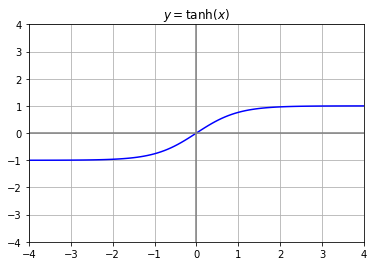

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)

plt.plot(x, np.tanh(x), 'b')

plt.axvline(0, color='gray')
plt.axhline(0, color='gray')

plt.title(r"$y=\tanh{(x)}$")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.show()

Two common limits/criteria are:
1. **"Shallow water"** (or long wave) - $\lambda>20\times d$, wavelength small and $kd$ small:

$$c=\sqrt{gd}$$

    speed here is dependent on depth but not on wavelength.

2. **"Deep water"** (or short wave) - $\lambda<2\times d$, wavelength is small and $kd$ is large:

$$c=\frac{g}{k}=\frac{g\lambda}{2\pi}$$

    speed here is dependent on wavelength but not on depth.

We can plot wave speed for different wavelength as a function of water depth:

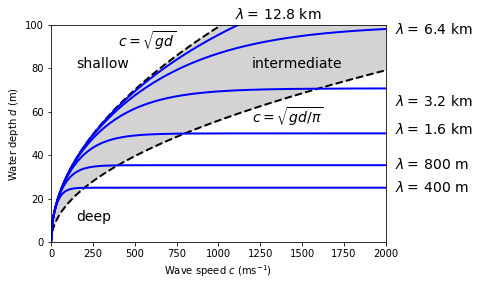

In [8]:
d = np.arange(0,2000,1)
g = 9.8

# Plot shallow, deep and intermediate conditions
plt.plot(d, np.sqrt(g*d), "k--", lw=2)
plt.plot(d, np.sqrt(g*d/np.pi), "k--", lw=2)
plt.fill_between(d, np.sqrt(g*d), np.sqrt(g*d/np.pi),
                 color="lightgray")

# Create plots for different depths
ll = [400., 800., 1600., 3200., 6400., 12800.]

# Create curve labels outside graph
x_positions = [0.92, 0.92, 0.92, 0.92, 0.92, 0.55]
y_positions = [0.3, 0.38, 0.5, 0.6, 0.85, 0.9]
text = ["$\lambda=\,$400 m",  "$\lambda=\,$800 m",
       "$\lambda=\,$1.6 km", "$\lambda=\,$3.2 km",
       "$\lambda=\,$6.4 km", "$\lambda=\,$12.8 km"]

for idx, l in enumerate(ll):
    k = 2*np.pi/l
    plt.plot(d, np.sqrt(g/k*np.tanh(k*d)), color="b", lw=2)
    plt.text(x_positions[idx], y_positions[idx], text[idx],
             fontsize=14, transform=plt.gcf().transFigure)

# Create labels in the graph
plt.text(150, 80, "shallow", fontsize=14)
plt.text(1200, 80, "intermediate", fontsize=14)
plt.text(150, 10, "deep", fontsize=14) 
plt.text(1200, 55, "$c=\sqrt{gd/\pi}$", fontsize=14)
plt.text(400, 90, "$c=\sqrt{gd}$", fontsize=14)

plt.ylim(0,100)
plt.xlim(0, 2000)
plt.xlabel("Wave speed $c$ (ms$^{-1}$)")
plt.ylabel("Water depth $d$ (m)")

plt.show()

Deep water waves that have greatest wavelength travel fastest.

The separation of waves by virtue of their differing rates of travel is known as **wave dispersion** and the dispersion equation/relation

$$c=\sqrt{\frac{g}{k}}=\sqrt{\frac{g\lambda}{2\pi}}=\frac{gT}{2\pi}$$

shows that waves of longer wavelength travel faster than shorter wavelength until we reach the  limit which applies for shallow water or long waves.

**Group velocity** (group speed) is the velocity that the wave envelope travels with. **Phase velocity** is the velocity of any one frequency component of the wave.

To illustrate that, we can plot two waves that are shifted and see what their superposition looks like:

In [9]:
x = np.arange(0, 30, 0.05)
amp = 0.1
L = 1.0
T = 5
k = 2*np.pi/L
omega = 2*np.pi/T
dk = k/15.
do = omega/30.
dt = 0.25

t = np.linspace(0,10*T,len(x))

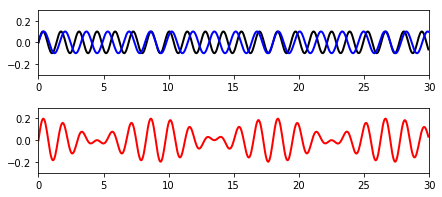

In [10]:
fig, axes = plt.subplots(2,1, figsize=(7,3))

styles = ["k","b", "r", "r--"]
y1 = amp*np.sin((k+dk)*x - (omega+do)*t)
y2 = amp*np.sin((k-dk)*x - (omega-do)*t)
y3 = y1 + y2

line1, = axes[0].plot(x, y1, styles[0], lw=2)
line2, = axes[0].plot(x, y2, styles[1], lw=2)
line3, = axes[1].plot(x, y3, styles[2], lw=2)

for ax in axes:
    ax.set_xlim(0,30)
    ax.set_ylim(-0.3,0.3)

plt.subplots_adjust(hspace=0.5)

plt.show()

Where crests of two waves coincide, the wave amplitudes are added and the resultant wave has $\sim$ twice the amplitude of the original waves. When the two waves are out of phase, the waves cancel out and minimal displacement is seen.

See excercise 5.2 for a derivation of profile to two superimposed waves of same amplitude $A$:

$$h=A\sin{[k_0(x-c_0 t)]}\cos{\Big[\delta k\Big(x-\frac{\delta\omega}{\delta k}t\Big)\Big]}$$

Now, we can animate this:

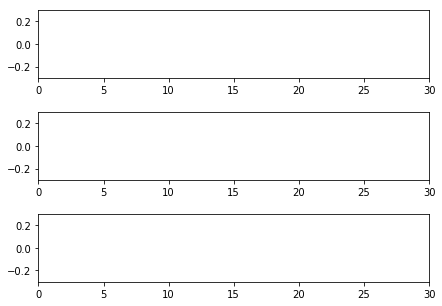

In [11]:
from matplotlib import animation, rc
from IPython.display import HTML

nframes = 201
t = [i*dt for i in range(nframes)]

# Plot background axes
fig, axes = plt.subplots(3,1, figsize=(7,5))

styles = ["k","b", "r", "r--"]

line1, = axes[0].plot([], [], styles[0], lw=2)
line2, = axes[1].plot([], [], styles[1], lw=2)
line3, = axes[2].plot([], [], styles[2], lw=2)
line4, = axes[2].plot([], [], styles[3], lw=2)

for ax in axes:
    ax.set_xlim(0,30)
    ax.set_ylim(-0.3,0.3)
    
lines = [line1, line2, line3, line4]
    
plt.subplots_adjust(hspace=0.5)

# Plot background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Set what data to plot in each frame
def animate(i):
    
    y1 = amp*np.sin((k+dk)*x - (omega+do)*t[i])
    lines[0].set_data(x, y1)
    
    y2 = amp*np.sin((k-dk)*x - (omega-do)*t[i])
    lines[1].set_data(x, y2)
    
    y3 = y1 + y2
    lines[2].set_data(x, y3)
    
    y4 = 2*amp*np.cos(dk*(x-(do/dk)*t[i]))
    lines[3].set_data(x, y4)
    
    return lines

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=20, blit=True)

In [12]:
# Display the animation
HTML(anim.to_html5_video())

Group speed can be expressed as:

$$c_g = \frac{1}{2}\frac{\omega}{k}\Big[1+\frac{4kH}{e^{2kd}-e^{-2kd}}\Big]$$

The two component wave trains interact, each losing their individual identity and combine into series of wave groups.

The wave group advances slower than the individual waves in the group. In deep water group speed is half the average phase speed of the two wave trains, in shallow water it is the same as the phase speed.

C:\Users\pc\Anaconda\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp


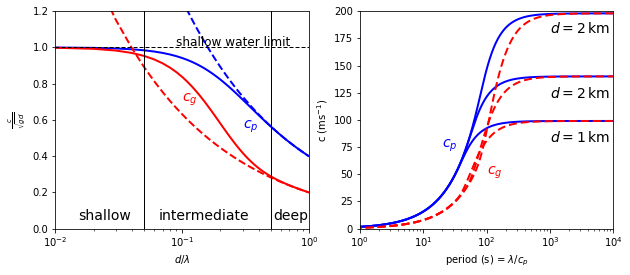

In [13]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

# Assign plots
ax1 = axes[0]
ax2 = axes[1]

# Make left plot
d_over_l = np.arange(0.01, 1, 0.01)
d = 100
l = d/d_over_l
k = 2*np.pi/l
g = 9.8
cp = np.sqrt((g/k)*np.tanh(k*d))
cg = 0.5*cp*(1+(4.*k*d/(np.exp(2*k*d)-np.exp(-2*k*d))))

plots_ax1 = [cp/np.sqrt(g*d), np.sqrt(g/k)/np.sqrt(g*d),
            cg/np.sqrt(g*d), 0.5*np.sqrt(g/k)/np.sqrt(g*d)]

colors_ax1 = ["b", "b--", "r","r--"]

for i in range(len(plots_ax1)):
    ax1.plot(d_over_l, plots_ax1[i], colors_ax1[i], lw=2)

ax1.axvline(0.5, color="k", lw=1)
ax1.axvline(0.05, color="k", lw=1)
ax1.axhline(1, color="k", dashes=(4,2), lw=1)

ax1.text(0.09, 1.01, "shallow water limit", fontsize=12)
ax1.text(0.1, 0.7, "$c_g$", fontsize=14, color="red")
ax1.text(0.3, 0.55, "$c_p$", fontsize=14, color="blue")
ax1.text(0.015, 0.05, "shallow", fontsize=14)
ax1.text(0.065, 0.05, "intermediate", fontsize=14)
ax1.text(0.52, 0.05, "deep", fontsize=14)

ax1.set_xscale("log")
ax1.set_xlim(0.01, 1)
ax1.set_ylim(0, 1.2)
ax1.set_xlabel("$d/\lambda$")
ax1.set_ylabel(r"$\frac{c}{\sqrt{gd}}$")

# Make right plot
l = np.arange(1, 2000000, 1)
k = 2*np.pi/l
g = 9.8
dd = [1000., 2000., 4000.]

# Create curve labels
labels = ["$d=1\,$km","$d=2\,$km","$d=2\,$km"]
x_positions = [1000, 1000, 1000] 
y_positions = [80, 120, 180]

for idx, d in enumerate(dd):
    cp = np.sqrt((g/k)*np.tanh(k*d))
    cg = 0.5*cp*( 1 + (4.*k*d/(np.exp(2*k*d)-np.exp(-2*k*d))))
    ax2.plot(l/cp, cp, color="b", lw=2)
    ax2.plot(l/cp, cg, color="r", lw=2, dashes=(4,2))
    ax2.text(x_positions[idx], y_positions[idx], labels[idx],
            fontsize=14)
    
ax2.text(100, 50, "$c_g$", fontsize=14, color="red")
ax2.text(20, 75, "$c_p$", fontsize=14, color="blue")    

ax2.set_xscale("log")
ax2.set_ylim(0,200)
ax2.set_xlim(1,10000)
ax2.set_xlabel("period (s) = $\lambda/c_p$")
ax2.set_ylabel("c (ms$^{-1}$)")

plt.show()

**References:**
* The information in this notebook was compiled based on Geophysical Fluid Dynamics for the Oceans course at ESE